<a href="https://colab.research.google.com/github/jnsbrdbr/thesis/blob/thesis/part9_TTUnsmote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import jaccard_score
from scipy.spatial.distance import pdist, squareform
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip3 install pickle5
import pickle5 as pickle

     |████████████████████████████████| 256 kB 5.4 MB/s 


In [4]:
with open('/content/drive/MyDrive/10000/ji/TTdata.pkl', "rb") as fh:
  adj = pickle.load(fh)

In [5]:
with open('/content/drive/MyDrive/10000/ji/TCFdf.pkl', "rb") as fh:
  CF = pickle.load(fh)

In [7]:
with open('/content/drive/MyDrive/10000/ji/TTFdf.pkl', "rb") as fh:
  TF = pickle.load(fh)

In [9]:
with open('/content/drive/MyDrive/10000/ji/TjaccardsimilaritydfR.pkl', "rb") as fh:
  jaccardsimilarity = pickle.load(fh)

In [11]:
with open('/content/drive/MyDrive/10000/ji/TcosinesimilaritydfR.pkl', "rb") as fh:
  cosine = pickle.load(fh)

In [13]:
with open('/content/drive/MyDrive/10000/ji/TL1normdf.pkl', "rb") as fh:
  L1_normdf = pickle.load(fh)

In [15]:
with open('/content/drive/MyDrive/10000/ji/Tsum.pkl', "rb") as fh:
  wsumdf = pickle.load(fh)

In [17]:
with open('/content/drive/MyDrive/10000/ji/Tmul.pkl', "rb") as fh:
  wmuldf = pickle.load(fh)

In [19]:
with open('/content/drive/MyDrive/10000/ji/Tadjadamicadardf.pkl', "rb") as fh:
  adjadamicadardf = pickle.load(fh)

In [21]:
with open('/content/drive/MyDrive/10000/ji/correlationdf.pkl', "rb") as fh:
  correlationdf = pickle.load(fh)

In [23]:
with open('/content/drive/MyDrive/10000/ji/euclideansimilaritydf.pkl', "rb") as fh:
  euclideansimilaritydf = pickle.load(fh)

In [26]:
with open('/content/drive/MyDrive/10000/ji/TLdata.pkl', "rb") as fh:
  adjl = pickle.load(fh)

In [6]:
#CF_pca
pca = PCA(n_components=10)
CF_pca = pca.fit_transform(CF)
CF_pca_df=pd.DataFrame(CF_pca)
CF_pca_df1=pd.DataFrame(CF_pca)
CF_pca_df.to_pickle('/content/drive/MyDrive/10000/unsmote/CF_pca_df.pkl')

In [ ]:
CF_TSNE = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(CF_pca)
CF_TSNE_df=pd.DataFrame(CF_TSNE)

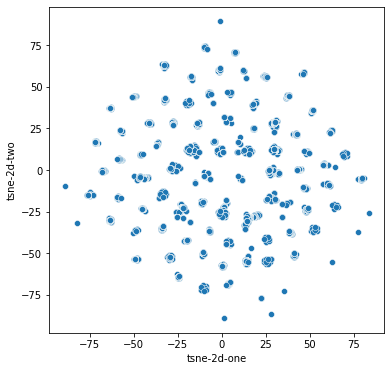

In [ ]:
CF_pca_df1['tsne-2d-one'] = CF_TSNE[:,0]
CF_pca_df1['tsne-2d-two'] = CF_TSNE[:,1]
plt.figure(figsize=(6,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="y",
    palette=sns.color_palette("hls", 10),
    data=CF_pca_df1,
    #legend="full",
    #alpha=0.3
)

In [8]:
#TF
pca = PCA(n_components=10)
TF_pca = pca.fit_transform(TF)
TF_pca_df=pd.DataFrame(TF_pca)
TF_pca_df1=pd.DataFrame(TF_pca)
CF_pca_df.to_pickle('/content/drive/MyDrive/10000/unsmote/TF_pca_df.pkl')

In [ ]:
TF_TSNE = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(TF_pca)
TF_TSNE_df=pd.DataFrame(TF_TSNE)

In [ ]:
TF_pca_df1['tsne-2d-one'] = TF_TSNE[:,0]
TF_pca_df1['tsne-2d-two'] = TF_TSNE[:,1]
plt.figure(figsize=(6,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="y",
    #palette=sns.color_palette("hls", 10),
    data=TF_pca_df1,
    #legend="full",
    #alpha=0.3
)

In [10]:
#jaccardsimilarity
pca = PCA(n_components=10)
jaccard_similarity_pca = pca.fit_transform(jaccardsimilarity)
jaccard_similarity_pca_df=pd.DataFrame(jaccard_similarity_pca)
jaccard_similarity_pca_df1=pd.DataFrame(jaccard_similarity_pca)
CF_pca_df.to_pickle('/content/drive/MyDrive/10000/unsmote/jaccard_similarity_pca_df.pkl')

In [ ]:
jaccard_similarity_TSNE = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(
    jaccard_similarity_pca)
jaccard_similarity_TSNE_df=pd.DataFrame(jaccard_similarity_TSNE)

In [ ]:
jaccard_similarity_pca_df1['tsne-2d-one'] = jaccard_similarity_TSNE[:,0]
jaccard_similarity_pca_df1['tsne-2d-two'] = jaccard_similarity_TSNE[:,1]
plt.figure(figsize=(6,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="y",
    #palette=sns.color_palette("hls", 10),
    data=jaccard_similarity_pca_df1,
    #legend="full",
    #alpha=0.3
)

In [12]:
#cosine
pca = PCA(n_components=10)
cosine_similarity_pca = pca.fit_transform(cosine)
cosine_similarity_pca_df=pd.DataFrame(cosine_similarity_pca)
cosine_similarity_pca_df1=pd.DataFrame(cosine_similarity_pca)
CF_pca_df.to_pickle('/content/drive/MyDrive/10000/unsmote/cosine_similarity_pca_df.pkl')

In [ ]:
cosine_similarity_TSNE = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(
    cosine_similarity_pca)
cosine_similarity_TSNE_df=pd.DataFrame(cosine_similarity_TSNE)

In [ ]:
cosine_similarity_pca_df1['tsne-2d-one'] = cosine_similarity_TSNE[:,0]
cosine_similarity_pca_df1['tsne-2d-two'] = cosine_similarity_TSNE[:,1]
plt.figure(figsize=(6,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="y",
    #palette=sns.color_palette("hls", 10),
    data=cosine_similarity_pca_df1,
    #legend="full",
    #alpha=0.3
)

In [14]:
#L1_normdf
pca = PCA(n_components=10)
L1_normdf_similarity_pca = pca.fit_transform(L1_normdf)
L1_normdf_similarity_pca_df=pd.DataFrame(L1_normdf_similarity_pca)
L1_normdf_similarity_pca_df1=pd.DataFrame(L1_normdf_similarity_pca)
CF_pca_df.to_pickle('/content/drive/MyDrive/10000/unsmote/L1_normdf_similarity_pca_df.pkl')

In [ ]:
L1_normdf_similarity_TSNE = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(L1_normdf_similarity_pca)
L1_normdf_similarity_TSNE_df=pd.DataFrame(L1_normdf_similarity_TSNE)

In [ ]:
L1_normdf_similarity_pca_df1['tsne-2d-one'] = L1_normdf_similarity_TSNE[:,0]
L1_normdf_similarity_pca_df1['tsne-2d-two'] = L1_normdf_similarity_TSNE[:,1]
plt.figure(figsize=(6,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="y",
    #palette=sns.color_palette("hls", 10),
    data=L1_normdf_similarity_pca_df1,
    #legend="full",
    #alpha=0.3
)

In [16]:
#wsumdf
pca = PCA(n_components=10)
wsumdf_similarity_pca = pca.fit_transform(wsumdf)
wsumdf_similarity_pca_df=pd.DataFrame(wsumdf_similarity_pca)
wsumdf_similarity_pca_df1=pd.DataFrame(wsumdf_similarity_pca)
CF_pca_df.to_pickle('/content/drive/MyDrive/10000/unsmote/wsumdf_similarity_pca_df.pkl')

In [ ]:
wsumdf_similarity_TSNE = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(wsumdf_similarity_pca)
wsumdf_similarity_TSNE_df=pd.DataFrame(wsumdf_similarity_TSNE)

In [ ]:
wsumdf_similarity_pca_df1['tsne-2d-one'] = wsumdf_similarity_TSNE[:,0]
wsumdf_similarity_pca_df1['tsne-2d-two'] = wsumdf_similarity_TSNE[:,1]
plt.figure(figsize=(6,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="y",
    #palette=sns.color_palette("hls", 10),
    data=wsumdf_similarity_pca_df1,
    #legend="full",
    #alpha=0.3
)

In [18]:
#wmuldf
pca = PCA(n_components=10)
wmuldf_similarity_pca = pca.fit_transform(wmuldf)
wmuldf_similarity_pca_df=pd.DataFrame(wmuldf_similarity_pca)
wmuldf_similarity_pca_df1=pd.DataFrame(wmuldf_similarity_pca)
CF_pca_df.to_pickle('/content/drive/MyDrive/10000/unsmote/wmuldf_similarity_pca_df.pkl')

In [ ]:
wmuldf_similarity_TSNE = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(wmuldf_similarity_pca)
wmuldf_similarity_TSNE_df=pd.DataFrame(wmuldf_similarity_TSNE)

In [ ]:
wmuldf_similarity_pca_df1['tsne-2d-one'] = wmuldf_similarity_TSNE[:,0]
wmuldf_similarity_pca_df1['tsne-2d-two'] = wmuldf_similarity_TSNE[:,1]
plt.figure(figsize=(6,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="y",
    #palette=sns.color_palette("hls", 10),
    data=wmuldf_similarity_pca_df1,
    #legend="full",
    #alpha=0.3
)

In [20]:
#adjadamicadardf
pca = PCA(n_components=10)
adjadamicadar_pca = pca.fit_transform(adjadamicadardf)
adjadamicadar_pca_df=pd.DataFrame(adjadamicadar_pca)
adjadamicadar_pca_df1=pd.DataFrame(adjadamicadar_pca)
CF_pca_df.to_pickle('/content/drive/MyDrive/10000/unsmote/adjadamicadar_pca_df.pkl')

In [ ]:
adjadamicadar_TSNE = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(adjadamicadar_pca)
adjadamicadar_TSNE_df=pd.DataFrame(adjadamicadar_TSNE)

In [ ]:
adjadamicadar_pca_df1['tsne-2d-one'] = adjadamicadar_TSNE[:,0]
adjadamicadar_pca_df1['tsne-2d-two'] = adjadamicadar_TSNE[:,1]
plt.figure(figsize=(6,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="y",
    #palette=sns.color_palette("hls", 10),
    data=adjadamicadar_pca_df1,
    #legend="full",
    #alpha=0.3
)

In [22]:
#correlationdf
pca = PCA(n_components=10)
correlation_smote_pca = pca.fit_transform(correlationdf)
correlation_smote_pca_df=pd.DataFrame(correlation_smote_pca)
correlation_smote_pca_df1=pd.DataFrame(correlation_smote_pca)
CF_pca_df.to_pickle('/content/drive/MyDrive/10000/unsmote/correlation_smote_pca_df.pkl')

In [ ]:
correlation_smote_TSNE = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(correlation_smote_pca)
correlation_smote_TSNE_df=pd.DataFrame(correlation_smote_TSNE)

In [ ]:
correlation_smote_pca_df1['tsne-2d-one'] = correlation_smote_TSNE[:,0]
correlation_smote_pca_df1['tsne-2d-two'] = correlation_smote_TSNE[:,1]
plt.figure(figsize=(6,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="y",
    #palette=sns.color_palette("hls", 10),
    data=correlation_smote_pca_df1,
    #legend="full",
    #alpha=0.3
)

In [24]:
#euclideansimilaritydf
pca = PCA(n_components=10)
euclideansimilarity_smote_pca = pca.fit_transform(euclideansimilaritydf)
euclideansimilarity_smote_pca_df=pd.DataFrame(euclideansimilarity_smote_pca)
euclideansimilarity_smote_pca_df1=pd.DataFrame(euclideansimilarity_smote_pca)
CF_pca_df.to_pickle('/content/drive/MyDrive/10000/unsmote/euclideansimilarity_smote_pca_df.pkl')

In [ ]:
euclideansimilarity_smote_TSNE = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(euclideansimilarity_smote_pca)
euclideansimilarity_smote_TSNE_df=pd.DataFrame(euclideansimilarity_smote_TSNE)

In [ ]:
euclideansimilarity_smote_pca_df1['tsne-2d-one'] = euclideansimilarity_smote_TSNE[:,0]
euclideansimilarity_smote_pca_df1['tsne-2d-two'] = euclideansimilarity_smote_TSNE[:,1]
plt.figure(figsize=(6,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="y",
    #palette=sns.color_palette("hls", 10),
    data=euclideansimilarity_smote_pca_df1,
    #legend="full",
    #alpha=0.3
)

In [27]:
l=adjl['label']
l_n=np.array(l)
l_df=pd.DataFrame(l_n)
l_df.columns=['label']

In [28]:
#concat
frames = [CF_pca_df, TF_pca_df, jaccard_similarity_pca_df,cosine_similarity_pca_df,
          L1_normdf_similarity_pca_df,wsumdf_similarity_pca_df,wmuldf_similarity_pca_df,
          adjadamicadar_pca_df,
          correlation_smote_pca_df,euclideansimilarity_smote_pca_df,l_df]
Tresult = pd.concat(frames,axis=1)

In [29]:
Tresult

,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,...,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,label
0,-0.018442,-4.220618,-0.916300,-0.715505,-0.868530,-1.348268,-0.474432,-0.004759,-0.581985,-0.079929,-99.021665,0.003454,0.432406,-0.008372,-0.005817,-3.177284,0.176766,-0.102138,-0.251150,-0.579266,-0.567667,-4.036812,-0.965039,-0.731102,-0.837785,-1.238780,-0.508382,-0.00396,-0.484216,-0.024417,-0.408046,-4.106399,-0.952151,-0.726880,-0.843857,-1.276737,-0.500570,-0.038968,-0.511939,-0.041500,...,4.461185e-04,-5.844821e-03,-3.378545e-04,-5.357677e-03,6.358602e-03,4.988258e-03,9.212194e-03,4.677706e-03,3.226993e-03,-0.001936,-0.592829,-0.135993,-0.105384,-0.131095,-0.226170,-0.079061,-0.001732,-0.103256,-0.009885,-95.643927,-0.014719,0.009422,-6.325577,0.677823,-1.221404,0.167545,-0.850514,0.100380,-1.003225,-0.573874,2.287554,0.686930,0.100448,-0.062517,0.119028,-0.441208,-0.219285,-0.010241,-0.181514,1
1,-0.018442,-4.220618,-0.916300,-0.715505,-0.868530,-1.348268,-0.474432,-0.004759,-0.581985,-0.079929,-99.021665,0.003454,0.432406,-0.008372,-0.005817,-3.177284,0.176766,-0.102138,-0.251150,-0.579266,-0.567667,-4.036812,-0.965039,-0.731102,-0.837785,-1.238780,-0.508382,-0.00396,-0.484216,-0.024417,-0.408046,-4.106399,-0.952151,-0.726880,-0.843857,-1.276737,-0.500570,-0.038968,-0.511939,-0.041500,...,4.495903e-03,-3.238911e-03,2.888849e-05,1.347142e-03,5.629929e-03,5.874576e-03,5.179258e-03,1.918522e-04,-8.652636e-05,-0.001936,-0.592829,-0.135993,-0.105384,-0.131095,-0.226170,-0.079061,-0.001732,-0.103256,-0.009885,-95.643927,-0.014719,0.009422,-6.325577,0.677823,-1.221404,0.167545,-0.850514,0.100380,-1.003225,-0.573874,2.287554,0.686930,0.100448,-0.062517,0.119028,-0.441208,-0.219285,-0.010241,-0.181514,1
2,-0.018442,-4.220618,-0.916300,-0.715505,-0.868530,-1.348268,-0.474432,-0.004759,-0.581985,-0.079929,-99.021665,0.003454,0.432406,-0.008372,-0.005817,-3.177284,0.176766,-0.102138,-0.251150,-0.579266,-0.567667,-4.036812,-0.965039,-0.731102,-0.837785,-1.238780,-0.508382,-0.00396,-0.484216,-0.024417,-0.408046,-4.106399,-0.952151,-0.726880,-0.843857,-1.276737,-0.500570,-0.038968,-0.511939,-0.041500,...,-2.923355e-04,3.381007e-03,1.053269e-02,-5.582110e-03,4.624059e-04,-5.191470e-03,-1.064344e-02,-5.973636e-03,7.781321e-03,-0.001936,-0.592829,-0.135993,-0.105384,-0.131095,-0.226170,-0.079061,-0.001732,-0.103256,-0.009885,-95.643927,-0.014719,0.009422,-6.325577,0.677823,-1.221404,0.167545,-0.850514,0.100380,-1.003225,-0.573874,2.287554,0.686930,0.100448,-0.062517,0.119028,-0.441208,-0.219285,-0.010241,-0.181514,1
3,-0.018442,-4.220618,-0.916300,-0.715505,-0.868530,-1.348268,-0.474432,-0.004759,-0.581985,-0.079929,-99.021665,0.003454,0.432406,-0.008372,-0.005817,-3.177284,0.176766,-0.102138,-0.251150,-0.579266,-0.567667,-4.036812,-0.965039,-0.731102,-0.837785,-1.238780,-0.508382,-0.00396,-0.484216,-0.024417,-0.408046,-4.106399,-0.952151,-0.726880,-0.843857,-1.276737,-0.500570,-0.038968,-0.511939,-0.041500,...,-6.647822e-03,-4.189251e-03,-1.024760e-02,-3.727775e-03,-5.076149e-03,6.091248e-03,-9.935005e-03,2.051826e-03,-5.670277e-03,-0.001936,-0.592829,-0.135993,-0.105384,-0.131095,-0.226170,-0.079061,-0.001732,-0.103256,-0.009885,-95.643927,-0.014719,0.009422,-6.325577,0.677823,-1.221404,0.167545,-0.850514,0.100380,-1.003225,-0.573874,2.287554,0.686930,0.100448,-0.062517,0.119028,-0.441208,-0.219285,-0.010241,-0.181514,1
4,-0.018444,-4.221080,-0.916678,-0.715889,-0.869072,-1.349276,-0.475212,-0.004857,-0.583281,-0.080453,4399.871791,-0.063050,-30.492457,0.006628,-7.694087,-2.758048,-5.738997,3.978466,15.198164,-1.999935,-0.567667,-4.036812,-0.965039,-0.731102,-0.837785,-1.238780,-0.508382,-0.00396,-0.484216,-0.024417,-0.408046,-4.106399,-0.952151,-0.726880,-0.843857,-1.276737,-0.500570,-0.038968,-0.511939,-0.041500,...,-6.037385e-08,-6.626141e-08,3.072878e-07,-6.502263e-09,1.178197e-07,-2.240861e-07,1.611705e-08,-1.357900e-07,1.305741e-07,-0.001948,-0.597367,-0.139

In [30]:
Tresult.to_pickle('/content/drive/MyDrive/10000/unsmote/TUnsmote_Tresult.pkl')